In [1]:
import pandas as pd
df = pd.read_csv('data.csv', names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment'])
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,1.683000e+03,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1.683000e+03,1683.000000
mean,1.520048e+09,11165.066411,11167.304504,11166.154427,11166.271676,1.603362,0.080407,1.018086e+06,0.142414
std,2.915845e+04,210.733103,210.449672,210.560828,210.652200,2.064508,0.033273,3.070836e+05,0.025759
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,0.018280,4.487650e+05,0.059554
25%,1.520023e+09,10979.025000,10984.970000,10981.925000,10982.010000,0.360388,0.054983,7.865490e+05,0.129554
50%,1.520048e+09,11269.970000,11271.970000,11269.980000,11270.000000,0.966789,0.073276,1.010231e+06,0.153628
75%,1.520073e+09,11323.480000,11324.060000,11324.045000,11324.045000,2.087378,0.108705,1.204360e+06,0.162382
max,1.520099e+09,11474.990000,11475.000000,11474.990000,11474.990000,23.988752,0.195451,1.707796e+06,0.176271


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.948410,0.947908,0.948247,0.948117,-0.079397,0.482909,-0.149289,0.608418
low,0.948410,1.000000,0.999696,0.999819,0.999858,-0.032859,0.457215,-0.250260,0.640586
high,0.947908,0.999696,1.000000,0.999854,0.999856,-0.024294,0.458216,-0.251322,0.640687
open,0.948247,0.999819,0.999854,1.000000,0.999714,-0.028978,0.458198,-0.251606,0.640842
close,0.948117,0.999858,0.999856,0.999714,1.000000,-0.027707,0.457498,-0.250127,0.640532
volume,-0.079397,-0.032859,-0.024294,-0.028978,-0.027707,1.000000,-0.036934,0.082409,-0.067844
tw_sentiment,0.482909,0.457215,0.458216,0.458198,0.457498,-0.036934,1.000000,-0.350499,0.336867
tw_followers,-0.149289,-0.250260,-0.251322,-0.251606,-0.250127,0.082409,-0.350499,1.000000,0.008195
reddit_sentiment,0.608418,0.640586,0.640687,0.640842,0.640532,-0.067844,0.336867,0.008195,1.000000


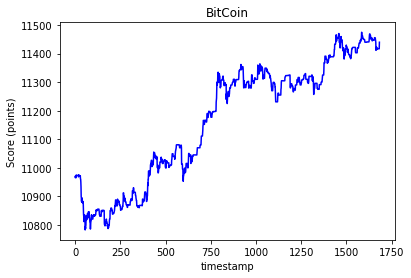

In [4]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
X = df[['tw_sentiment', 'reddit_sentiment']]
y = df['close'].values.reshape(-1, 1)

In [7]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.2, shuffle=False)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(1346, 1, 2)

In [10]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(150, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=300, validation_data=(X_test, y_test), shuffle=False)

Train on 1346 samples, validate on 337 samples
Epoch 1/300
1346/1346 [==============================] - 2s 1ms/step - loss: 0.4680 - val_loss: 0.8992
Epoch 2/300
1346/1346 [==============================] - 0s 41us/step - loss: 0.4566 - val_loss: 0.8882
Epoch 3/300
1346/1346 [==============================] - 0s 45us/step - loss: 0.4468 - val_loss: 0.8752
Epoch 4/300
1346/1346 [==============================] - 0s 44us/step - loss: 0.4351 - val_loss: 0.8628
Epoch 5/300
1346/1346 [==============================] - 0s 48us/step - loss: 0.4242 - val_loss: 0.8492
Epoch 6/300
1346/1346 [==============================] - 0s 44us/step - loss: 0.4126 - val_loss: 0.8355
Epoch 7/300
1346/1346 [==============================] - 0s 53us/step - loss: 0.4009 - val_loss: 0.8209
Epoch 8/300
1346/1346 [==============================] - 0s 48us/step - loss: 0.3889 - val_loss: 0.8055
Epoch 9/300
1346/1346 [==============================] - 0s 48us/step - loss: 0.3764 - val_loss: 0.7894
Epoch 10/300
1346/

Epoch 79/300
1346/1346 [==============================] - 0s 45us/step - loss: 0.1653 - val_loss: 0.2793
Epoch 80/300
1346/1346 [==============================] - 0s 43us/step - loss: 0.1646 - val_loss: 0.2786
Epoch 81/300
1346/1346 [==============================] - 0s 44us/step - loss: 0.1644 - val_loss: 0.2772
Epoch 82/300
1346/1346 [==============================] - 0s 58us/step - loss: 0.1638 - val_loss: 0.2753
Epoch 83/300
1346/1346 [==============================] - 0s 58us/step - loss: 0.1632 - val_loss: 0.2724
Epoch 84/300
1346/1346 [==============================] - 0s 54us/step - loss: 0.1607 - val_loss: 0.2693
Epoch 85/300
1346/1346 [==============================] - 0s 59us/step - loss: 0.1621 - val_loss: 0.2662
Epoch 86/300
1346/1346 [==============================] - 0s 53us/step - loss: 0.1600 - val_loss: 0.2632
Epoch 87/300
1346/1346 [==============================] - 0s 52us/step - loss: 0.1593 - val_loss: 0.2614
Epoch 88/300
1346/1346 [==============================]

Epoch 157/300
1346/1346 [==============================] - 0s 65us/step - loss: 0.1518 - val_loss: 0.2723
Epoch 158/300
1346/1346 [==============================] - 0s 65us/step - loss: 0.1523 - val_loss: 0.2716
Epoch 159/300
1346/1346 [==============================] - 0s 67us/step - loss: 0.1510 - val_loss: 0.2725
Epoch 160/300
1346/1346 [==============================] - 0s 72us/step - loss: 0.1502 - val_loss: 0.2721
Epoch 161/300
1346/1346 [==============================] - 0s 71us/step - loss: 0.1521 - val_loss: 0.2723
Epoch 162/300
1346/1346 [==============================] - 0s 63us/step - loss: 0.1506 - val_loss: 0.2717
Epoch 163/300
1346/1346 [==============================] - 0s 70us/step - loss: 0.1504 - val_loss: 0.2729
Epoch 164/300
1346/1346 [==============================] - 0s 71us/step - loss: 0.1495 - val_loss: 0.2745
Epoch 165/300
1346/1346 [==============================] - 0s 66us/step - loss: 0.1497 - val_loss: 0.2753
Epoch 166/300
1346/1346 [=====================

Epoch 235/300
1346/1346 [==============================] - 0s 57us/step - loss: 0.1492 - val_loss: 0.2676
Epoch 236/300
1346/1346 [==============================] - 0s 60us/step - loss: 0.1484 - val_loss: 0.2700
Epoch 237/300
1346/1346 [==============================] - 0s 47us/step - loss: 0.1499 - val_loss: 0.2743
Epoch 238/300
1346/1346 [==============================] - 0s 58us/step - loss: 0.1488 - val_loss: 0.2767
Epoch 239/300
1346/1346 [==============================] - 0s 55us/step - loss: 0.1474 - val_loss: 0.2780
Epoch 240/300
1346/1346 [==============================] - 0s 59us/step - loss: 0.1482 - val_loss: 0.2800
Epoch 241/300
1346/1346 [==============================] - 0s 57us/step - loss: 0.1491 - val_loss: 0.2785
Epoch 242/300
1346/1346 [==============================] - 0s 64us/step - loss: 0.1499 - val_loss: 0.2763
Epoch 243/300
1346/1346 [==============================] - 0s 58us/step - loss: 0.1494 - val_loss: 0.2722
Epoch 244/300
1346/1346 [=====================

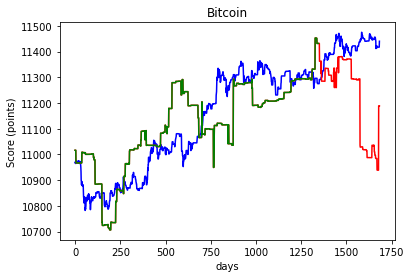

In [12]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train))
y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test))

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')
plt.show()

In [18]:
df[['close','tw_sentiment']].groupby(df['time']).mean()

,close,tw_sentiment
time,,
1519997640,10969.00,0.195409
1519997700,10969.00,0.195409
1519997760,10965.01,0.195409
1519997820,10965.00,0.195408
1519997880,10964.80,0.195451
1519997940,10964.81,0.112712
1519998000,10974.00,0.112712
1519998060,10969.02,0.112712
1519998120,10973.29,0.113498
